# Solving Initial Value Problems for ODEs, Part 2: Runge-Kutta Methods

**Updated on March 22**

**References:**

- Sections 6.4 of [Sauer](../references.html#Sauer)

- Section 5.4 of [Burden&Faires](../references.html#Burden-Faires)

- Sections 7.1 and 7.2 of [Chenney&Kincaid](../references.html#Chenney-Kincaid)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Shortcuts for some favorite commands:
from numpy import linspace
from matplotlib.pyplot import figure, plot, grid, title, xlabel, ylabel, legend

Introduction
------------

The original Runge-Kutta method is the fourth order accurate one to be described below, which is still used a lot, though with some modifications.

However, the name is now applied to a variety of methods based on a similar strategy, so first, herr are a few simpler methods, all of some value, at least for small, low precision calculations.

## Euler's Method as a Runge-Kutta method

The simplest of all methods of this general form is Euler's method.
To set up the notation to be used below, rephrase it this way:

To get from $(t, u)$ to an approximation of $(t+h, u(t+h))$, use the approximation

$$\begin{split}
K_1 &= h f(t, u)
\\
u(t+h) &\approx u + K_1
\end{split}$$

## Second order Runge-Kutta methods

We have seen that the global error of Euler's method is $O(h)$: it is only first order accurate.
This is often insufficient, so it is more common even for small, low precision calculation to use one of several second order methods:

### The Explicit Trapezoid Method (a.k.a. the Improved Euler method or Huen's method)

One could try to adapt the trapezoid method for integrating $f(t)$ to solve $du/dt = f(t)$

$$
u(t + h) = u(t) + \int_{t}^{t + h} f(s) ds \approx u(t) + \frac{f(t) + f(t+h)}{2} h
$$

to solving the ODE $du/dt = f(t, u)$ but there is a problem that needs to be overcome:

we get

$$
u(t + h) \approx u(t) + \frac{f(t, u(t)) + f(t+h, u(t+h))}{2} h
$$

and inserting the values $U_i \approx u(t_i)$ and so on gives

$$
U_{i+1} \approx U_i + \frac{f(t_i, U_i) + f(t_{i+1}, U_{i+1}))}{2} h
$$

But if we have so far only solved up to $t=t_i$ and thus $U_i$, the unknown quantity that we seek, $U_{i+1}$, appears at the right-hand side too: we only have an *implicit* formula for it.

This is known as the *Implicit Trapezoid Rule* and one could try to solve this equation for $U_{i+1}$, using methods seen earlier in this course such as fixed pint iteration or the secant method.

However, for now we get around this by using an approximation of $U_{i+1}$ at right — the only one we know so far, given by Euler's Method.

So at right, we replace $U_{i+1} \approx U_i + h f(t_i, U_i)$, giving the rule

$$
U_{i+1} = U_i + \frac{f(t_i, U_i) + f(t_{i+1}, U_i + h f(t_i, U_i))}{2} h
$$

It is convenient to break this down into two stages, one for each evalution of $f(t, u)$;
the *Explicit Trapezoid Rule* is based on

$$\begin{split}
K_1 &= h f(t, u)
\\
K_2 &= h f(t+h, u + K_1)
\\
u(t+h) &\approx u + \frac{1}{2}(K_1 + K_2)
\end{split}$$

For equal sized time steps, this leads to the approximate solution formulas

$$\begin{split}
U_0 &= u_0
\\
U_{i+1} &= U_i + \frac{1}{2}(K_1 + K_2)
\\
&\quad \text{where}
\\
K_1 &= h f(t_i, U_i)
\\
K_2 &= h f(t_{i+1}, U_i + K_1)
\end{split}$$

**Exercise 1**

A) Verify that for the simple case where $f(t, u) = f(t)$,
this gives the same result as the Composite Trapezoid Rule for integration.

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to $G=1+kh$ seen for Euler's Method.

D) Use the previous result to express $U_i$ in terms of $U_0=u_0$, as done for Euler's Method.

In [2]:
def explicitTrapezoid(f, a, b, u_0, n=100, demoMode=False):
    """Use the Explict Trapezoid Method (a.k.a Improved Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        K_1 = f(t[i], u[i])*h
        K_2 = f(t[i]+h, u[i]+K_1)*h
        u[i+1] = u[i] + (K_1 + K_2)/2.
    return (t, u)

As always, this function can now also be imported, with

    from numerical_methods_module import explicitTrapezoid

### Examples 

For all methods in this section, we will solve for versions of Example 2 and 4 in the section
[Solving Initial Value Problems for Ordinary Differential Equations, Part 1](ODE-IVP-1-basics-and-Euler.ipynb).

$$
\frac{du}{dt} = f_1(t, u) = K u
$$

with general solution

$$
u(t) = u_1(t; a, u_0) = u_0 e^{t-a}
$$

and

$$
\frac{du}{dt}  = K(\cos(t) - u) - \sin(t)
$$

with general solution

$$
u(t) = u_2(t; a, u_0) = \cos(t) + C e^{-K t},\quad C = (u_0 - \cos(a)) e^{K a}
$$

For comparison to Euler's Method, the same examples are done with it [below](#euler-redux)

In [3]:
def f_1(t, u):
    """The simplest "genuine" ODE, (not just integration)
    The solution is u(t) = u(t; a, u_0) = u_0 exp(t-a)
    """
    return K*u
def u_1(t): return u_0 * np.exp(K*(t-a))

In [4]:
def f_2(t, u):
    """A simple more "generic" test case, with f(t, u) depending on both variables.
    The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
    The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
    """
    return  K*(np.cos(t) - u) - np.sin(t)
def u_2(t): return np.cos(t) + C * np.exp(-K*t)

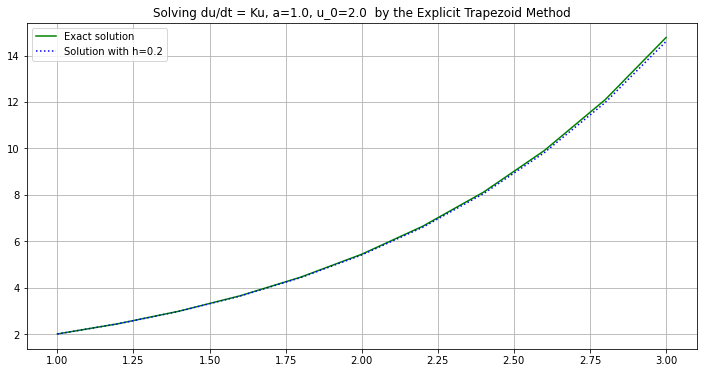

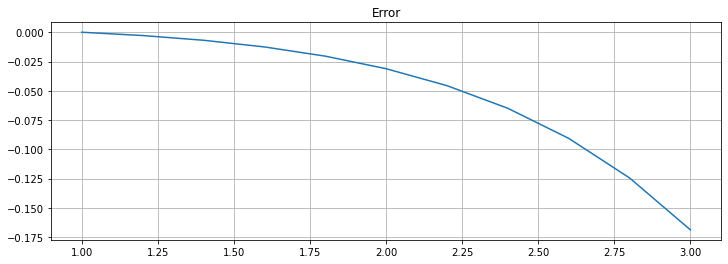

In [5]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = explicitTrapezoid(f_1, a, b, u_0, n, demoMode=True)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}  by the Explicit Trapezoid Method")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

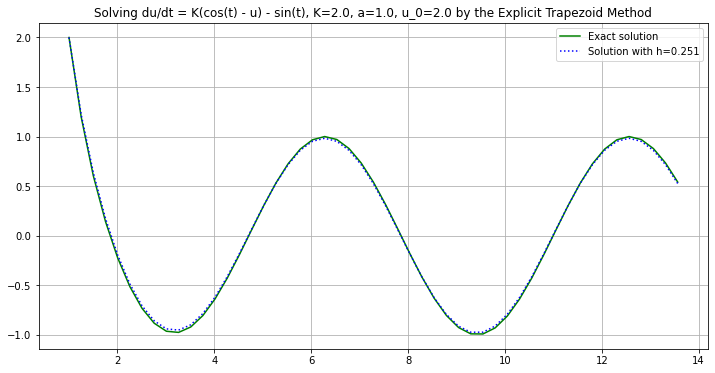

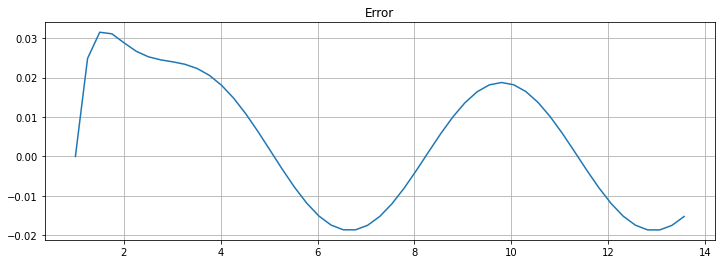

In [6]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f_2(t, u):
        """A simple more "generic" test case, with f(t, u) depending on both variables.
        The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
        The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
        """
        return  K*(np.cos(t) - u) - np.sin(t)
    def u_2(t): return np.cos(t) + C * np.exp(-K*t)

    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = explicitTrapezoid(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by the Explicit Trapezoid Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

### The Explicit Midpoint Method (a.k.a. Modified Euler)

If we start with the Midpoint Rule in place of the Trapezoid Rule, we likewise get an *Implicit Midpoint Rule*, and the same appoximation strategy then gives the *Explicit Midpoint Rule*

$$\begin{split}
K_1 &= h f(t, u)
\\
K_2 &= h f(t+h/2, u + K_1/2)
\\
u(t+h) &\approx u + K_2
\end{split}$$

**Exercise 2** (a lot like Exercise 1)

A) Verify that for the simple case where $f(t, u) = f(t)$,
this give the same result as the Composite Midpoint rule for integration (same cooment as above).

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to the growth factors $G$ seen for previous methods, and to the growth factor $g$ for the exact solution.

**Exercise 3**

A) Apply Richardson extrapolation to one step of Euler's method, using the values given by step sizes $h$ and $h/2$.

B) This should give a second order accurate method, so compare it to the above two methods.

In [7]:
def explicitMidpoint(f, a, b, u_0, n=100, demoMode=False):
    """Use the Explicit Midpoint Method (a.k.a Modified Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        K_1 = f(t[i], u[i])*h
        K_2 = f(t[i]+h/2, u[i]+K_1/2)*h
        u[i+1] = u[i] + K_2
    return (t, u)

Or import with

    from numerical_methods_module import explicitMidpoint

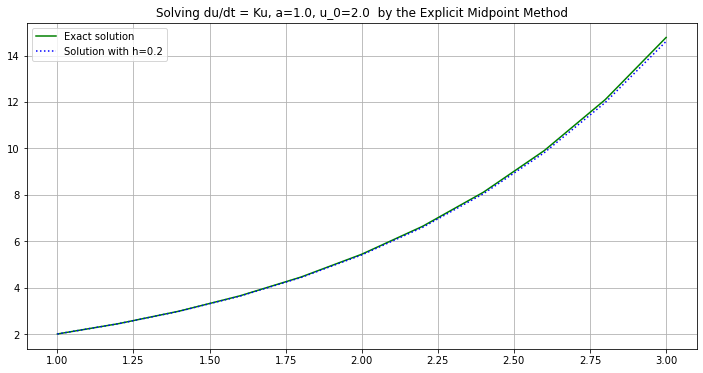

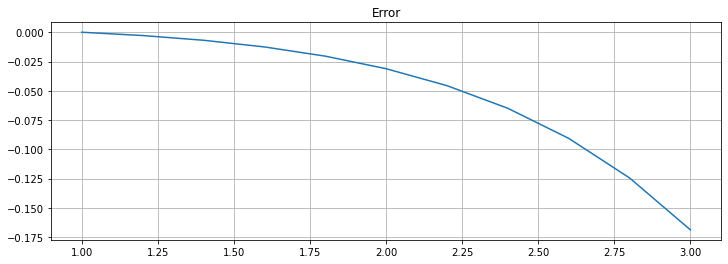

In [8]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = explicitMidpoint(f_1, a, b, u_0, n, demoMode=True)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}  by the Explicit Midpoint Method")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

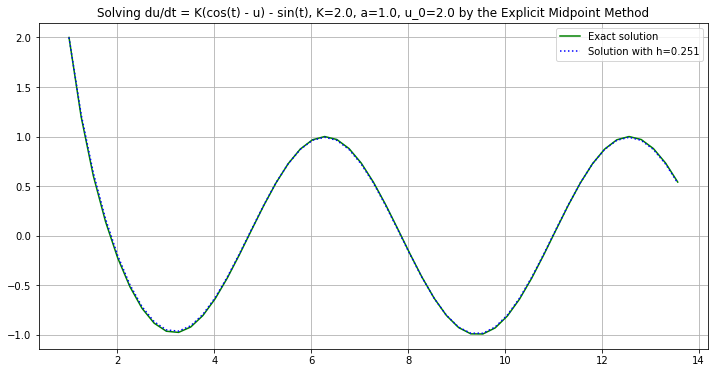

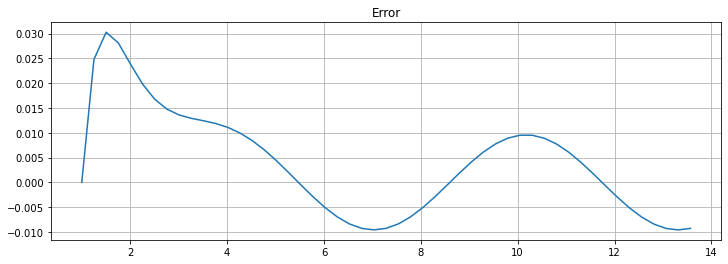

In [9]:
    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = explicitMidpoint(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by the Explicit Midpoint Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

### The "classical", fourth order accurate, Runge-Kutta Method

This is the original Runge-Kutta method:

$$\begin{split}
K_1 &= h f(t, u)
\\
K_2 &= h f(t + h/2, u + K_1/2)
\\
K_3 &= h f(t + h/2, u + K_2/2)
\\
K_4 &= h f(t + h, u + K_3)
\\
u(t+h) &\approx u + \frac{1}{6}(K_1 + 2 K_2 + 2 K_3 + K_4)
\end{split}$$

**Exercise 4**

A) Verify that for the simple case where $f(t, u) = f(t)$,
this gives the same result as the Composite Simpson's Rule for integration.

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to the growth factors $G$ seen for previous methods, and to the growth factor $g$ for the exact solution.

In [10]:
def RungeKutta(f, a, b, u_0, n=100, demoMode=False):
    """Use the (classical) Runge-Kutta Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        K_1 = f(t[i], u[i])*h
        K_2 = f(t[i]+h/2, u[i]+K_1/2)*h
        K_3 = f(t[i]+h/2, u[i]+K_2/2)*h
        K_4 = f(t[i]+h, u[i]+K_3)*h
        u[i+1] = u[i] + (K_1 + 2*K_2 + 2*K_3 + K_4)/6
    return (t, u)

Or import with

    from numerical_methods_module import RungeKutta

### Solving for versions of Example 2 and 4 in the previous section

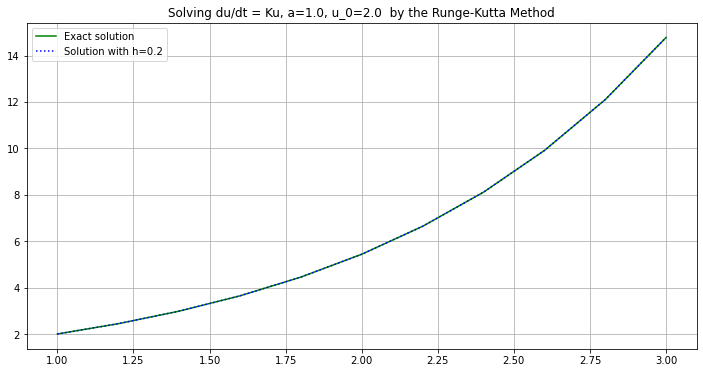

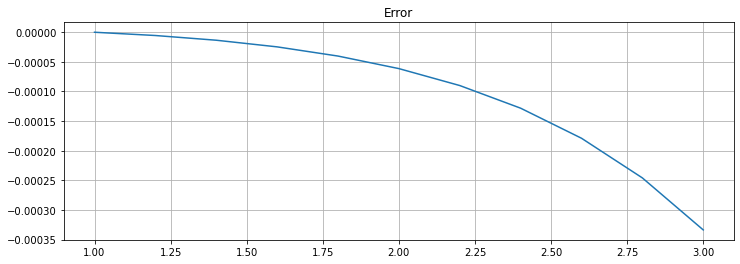

In [11]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = RungeKutta(f_1, a, b, u_0, n, demoMode=True)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}  by the Runge-Kutta Method")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

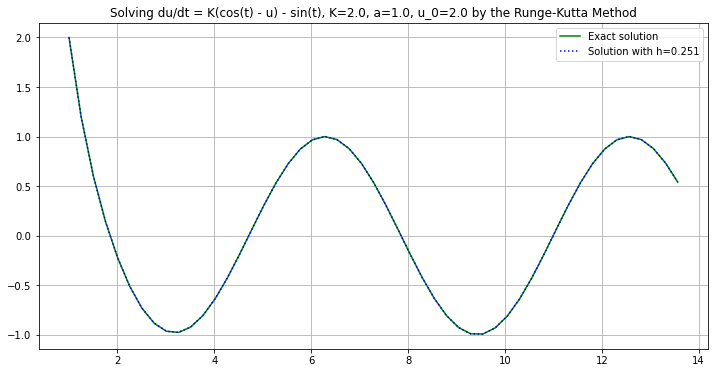

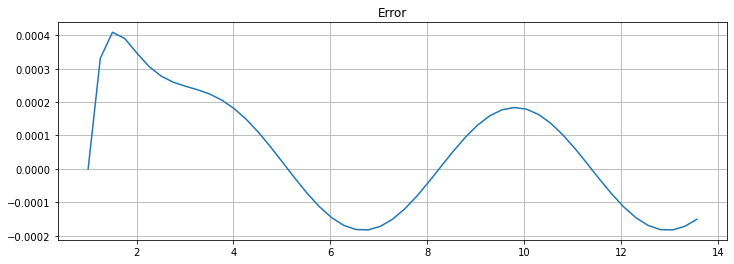

In [12]:
    def f_2(t, u):
        """A simple more "generic" test case, with f(t, u) depending on both variables.
        The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
        The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
        """
        return  K*(np.cos(t) - u) - np.sin(t)
    def u_2(t): return np.cos(t) + C * np.exp(-K*t)

    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = RungeKutta(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by the Runge-Kutta Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

<a name="euler-redux"></a>
### For comparison: the above two examples done with Euler's Method

In [13]:
from numerical_methods_module import euler

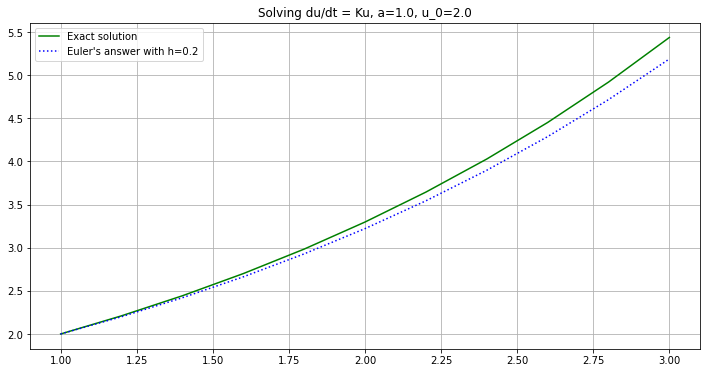

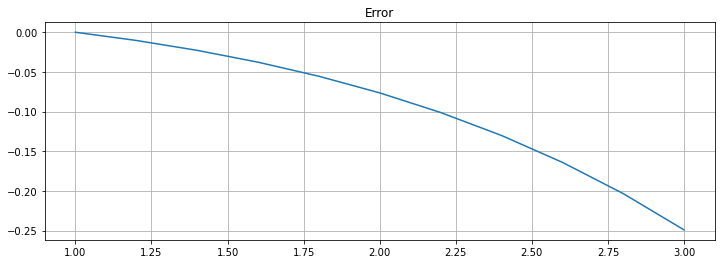

In [14]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 0.5
    n = 10

    (t, U) = euler(f_1, a, b, u_0, n)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

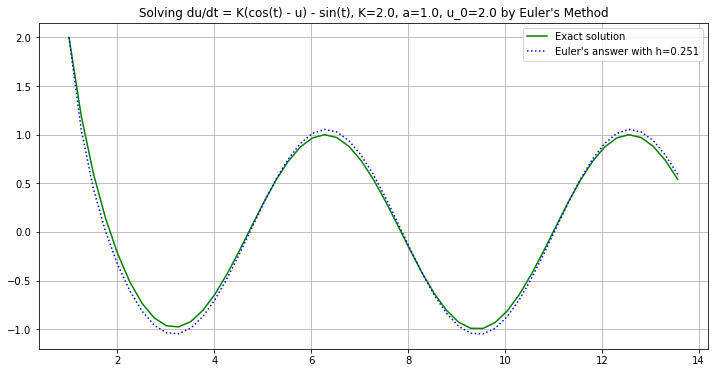

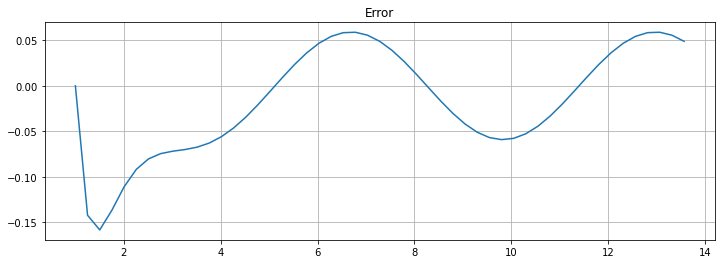

In [15]:
    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = euler(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,6])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by Euler's Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)